
# Structural descriptors for the complex netwroks in the CircularEconomy model

## Numerical descriptors

1. Number of nodes
2. Number of edges
3. Minimum, maximum and average degree
4. Average clustering coefficient (average of the clustering coefficients of each node)
5. Assortativity
6. Average path length (average distance between all pairs of nodes)
7. Diameter (maximum distance between nodes in the network)

In [1]:
# Reading the data from the database
## autoreload 
%load_ext autoreload
%autoreload 2

from utils.helpers import reading_data,constructing_graph

In [2]:
## defining the paths: 
PATH = "./data/clean_data.csv"
df = reading_data(PATH)
df.head()

,M-001,M-002,M-003,M-004,M-005,M-006,M-007,M-008,M-009,M-010,M-011,M-012,M-013,M-014,M-015,M-016,M-017,M-018,M-019,M-020
Processes,,,,,,,,,,,,,,,,,,,,
P-001,-73,0,59,0,48,0,0,0,0,0,0,-60,0,0,-26,0,0,-9,-15,0
P-002,0,0,0,0,73,0,0,11,0,69,71,0,36,-33,33,-82,64,0,-38,-92
P-003,0,0,0,58,26,0,0,92,43,0,0,-42,34,-4,5,0,0,0,0,0
P-004,0,71,-28,0,-76,0,4,-12,0,0,-11,0,-21,0,0,-28,0,18,0,0
P-005,0,-2,0,-71,37,0,0,19,16,-43,-9,98,-7,0,0,0,0,-91,22,4


---------DESCRIPTORS FOR THE GRAPH---------
*******************************************
Is the graph directed?           : False
Number of nodes                  : 50
Number of edges                  : 297
Maximum degree                   : ('M-008', 21)
Minimum degree                   : ('P-001', 7)
Diameter                         : 3
Radius                           : 3
Number of connected components   : 1
Number of self loops             : 0
Average path length              : 2.0048979591836735

**************************************************************************************
Clustering coefficient           : {'P-001': 0, 'P-002': 0, 'P-003': 0, 'P-004': 0, 'P-005': 0, 'P-006': 0, 'P-007': 0, 'P-008': 0, 'P-009': 0, 'P-010': 0, 'P-011': 0, 'P-012': 0, 'P-013': 0, 'P-014': 0, 'P-015': 0, 'P-016': 0, 'P-017': 0, 'P-018': 0, 'P-019': 0, 'P-020': 0, 'P-021': 0, 'P-022': 0, 'P-023': 0, 'P-024': 0, 'P-025': 0, 'P-026': 0, 'P-027': 0, 'P-028': 0, 'P-029': 0, 'P-030': 0, 'M-001': 0,

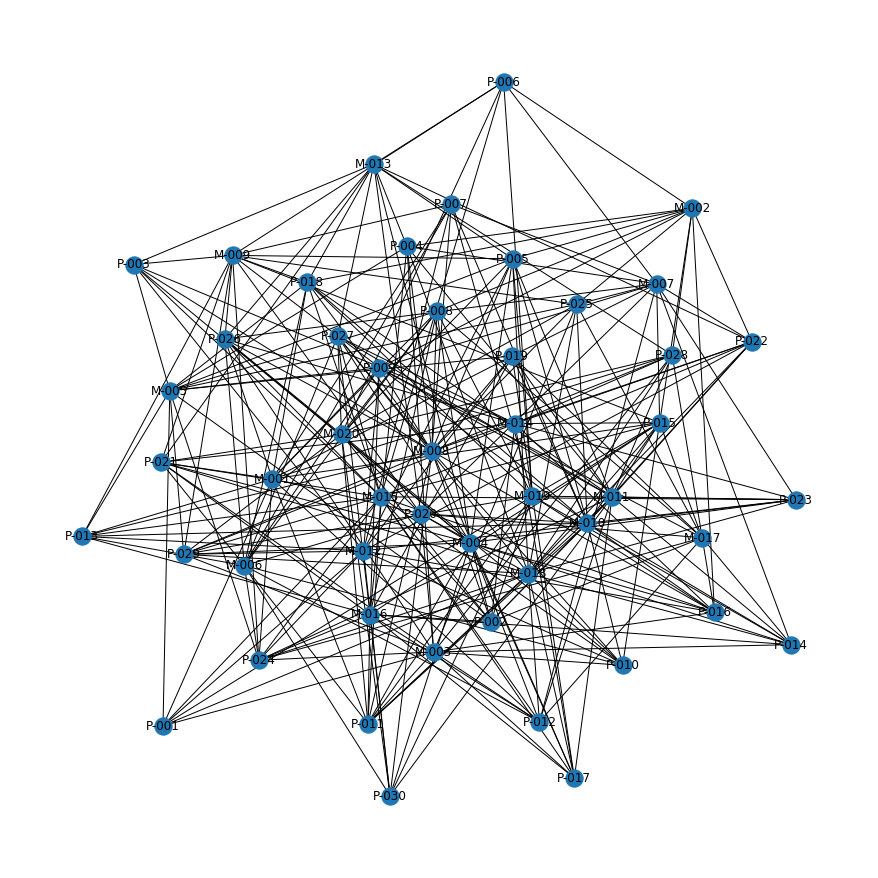

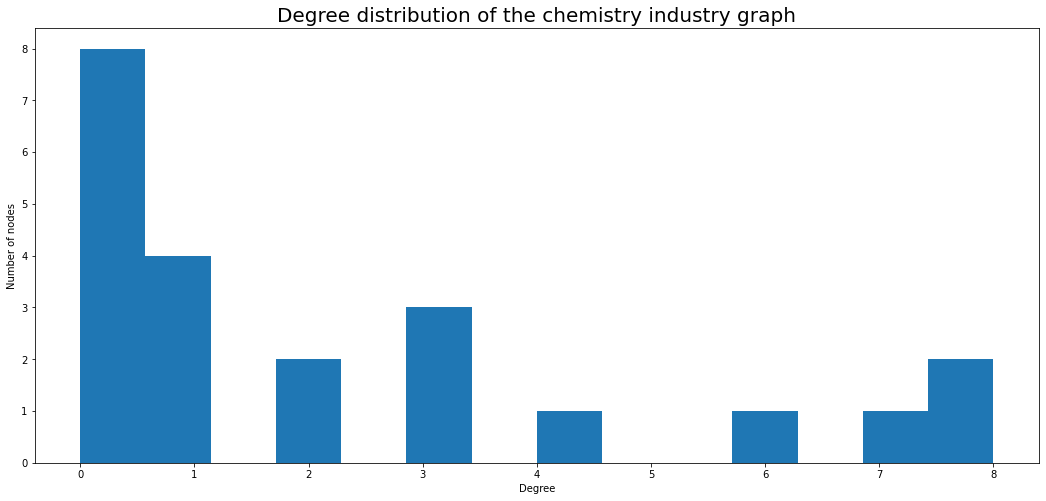

In [3]:
G, degrees, Max_degree, Min_degree, avg_path_lenght, loops = constructing_graph(df)